In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ri = pd.read_csv('data/police.csv')

In [4]:
# group all drivers by gender and get the counts for each value
# in the 'violation' column (i.e. speeding, other, etc.)        
driver_gender_violation = ri.groupby('driver_gender').violation.value_counts()


In [5]:
#show the result of the groupby operation
driver_gender_violation

driver_gender  violation          
F              Speeding               15646
               Moving violation        3286
               Equipment               2501
               Registration/plates     1056
               Other                    707
               Seat belt                578
M              Speeding               32777
               Moving violation       12938
               Equipment               8420
               Other                   3702
               Registration/plates     2647
               Seat belt               2278
Name: violation, dtype: int64

<AxesSubplot:xlabel='driver_gender,violation'>

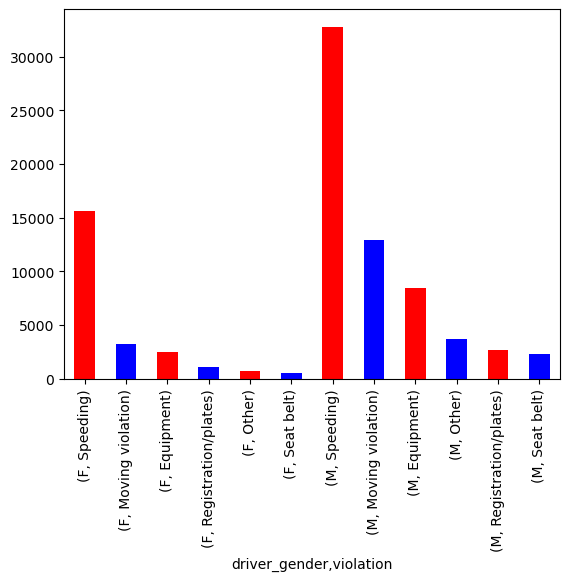

In [6]:
# plot the result of the groupby operation as a bar chart
# with different colors for M and F
driver_gender_violation.plot(
    kind='bar', color=['red', 'blue'])



In [7]:
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [8]:
white = ri[ri.driver_race == 'White']
white.stop_outcome.value_counts(normalize=True)

Citation            0.902234
Warning             0.057522
Arrest Driver       0.024017
No Action           0.007047
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [9]:
race_groups = ri.groupby('driver_race').stop_outcome.value_counts(normalize=True)

In [10]:
race_df = race_groups.unstack()

In [11]:
race_df

stop_outcome,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning
driver_race,,,,,,
Asian,0.017573,0.001674,0.923013,0.004184,0.008368,0.045188
Black,0.054294,0.008303,0.857224,0.008547,0.006512,0.065120
Hispanic,0.055310,0.006888,0.852061,0.009458,0.008841,0.067441
Other,0.007547,NaN,0.920755,0.007547,0.011321,0.052830
White,0.024017,0.002748,0.902234,0.006433,0.007047,0.057522


<AxesSubplot:xlabel='driver_race'>

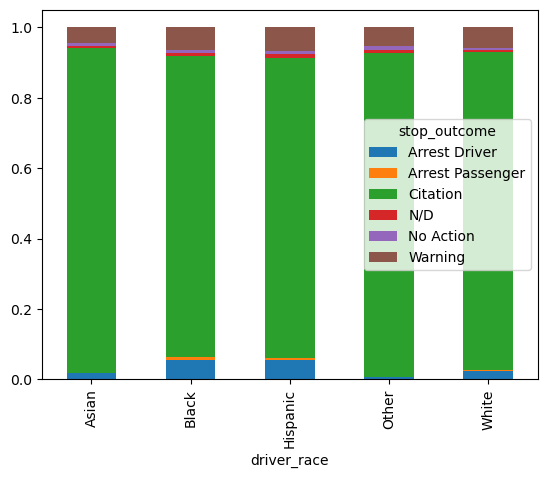

In [12]:
race_df.plot(kind='bar', stacked=True)

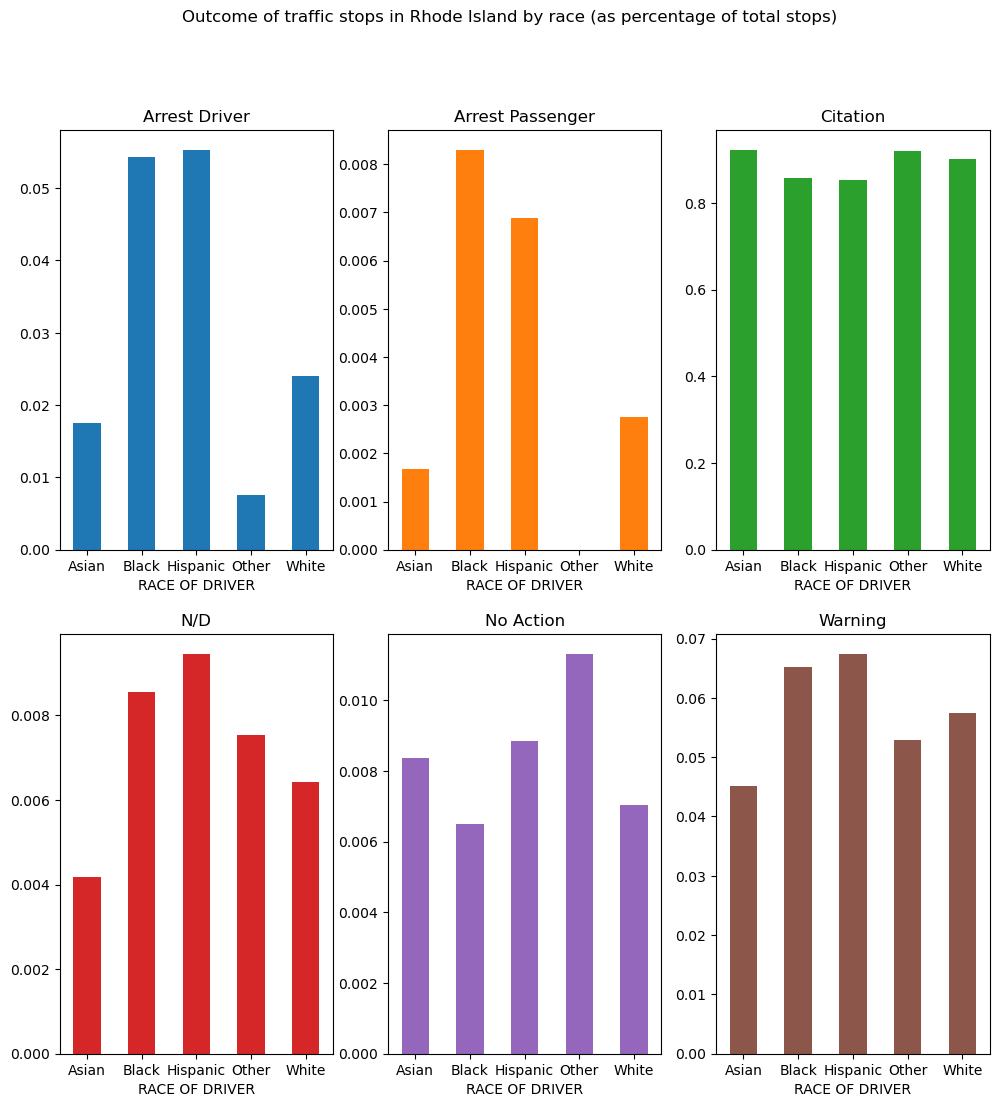

In [29]:
# Split race_df into six different bar graphs by 
# stop outcome with different colors based on race for each bar
# Change the colors based on index value
race_df_plot = race_df.plot(kind='bar', 
             subplots=True, 
             figsize=(12, 12), 
             layout=(2, 3), 
             sharex=False, 
             sharey=False, 
             legend=False,
             rot=0,
             xlabel='RACE OF DRIVER', # Superfluous, already obvious from title
             title='Outcome of traffic stops in Rhode Island by race (as percentage of total stops)');

race_df_plot;


In [ ]:
r